# Random Forests

Mean accuracy 0.7605902777777779
Standard deviation 0.02128347603747223


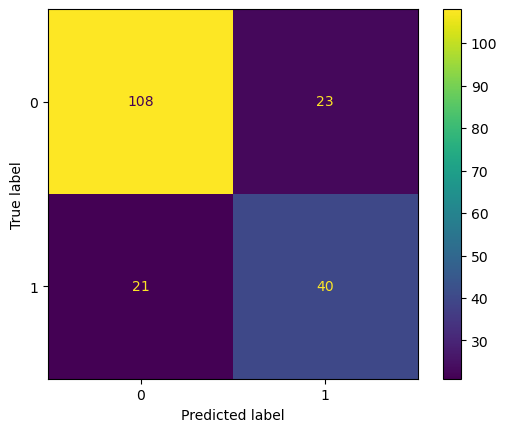

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("diabetes.csv")

dx = data.drop("Outcome", axis = 1)
dy = data[["Outcome"]]

repeats = 30
accuracies = []

for i in range(0, repeats):
    dx_train, dx_test, dy_train, dy_test = train_test_split(dx, dy, test_size = 0.25)

    rfm = RandomForestClassifier(n_estimators=500, max_features=4)
    rfm.fit(dx_train, dy_train.values.ravel())

    dy_pred = rfm.predict(dx_test)
    accuracies.append(accuracy_score(dy_test, dy_pred))

print("Mean accuracy", np.mean(accuracies))
print("Standard deviation", np.std(accuracies))
cm = confusion_matrix(dy_test, dy_pred)
ConfusionMatrixDisplay(cm).plot()